In [2]:
data = pd.read_csv("../data/train.csv")
data[:5]

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [3]:
len(data)

11218

In [4]:
data.nunique()

video_id               12
time                11204
event                   5
event_attributes       14
dtype: int64

In [5]:
types_of_actions =  data['event'].value_counts()
types_of_actions

play         3586
start        3418
end          3418
challenge     624
throwin       172
Name: event, dtype: int64

In [6]:
data['event_attributes'].isna().sum()

6836

<AxesSubplot:>

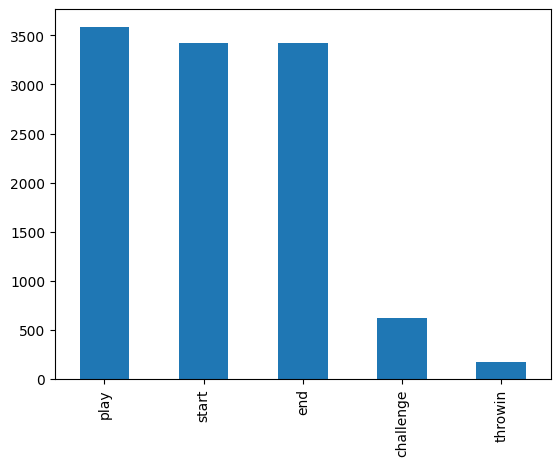

In [7]:
data['event'].value_counts().plot.bar()

In [8]:
data_percentage =  (types_of_actions[:] / types_of_actions[:].sum()) * 100
data_percentage

play         31.966482
start        30.468889
end          30.468889
challenge     5.562489
throwin       1.533250
Name: event, dtype: float64

<AxesSubplot:ylabel='event'>

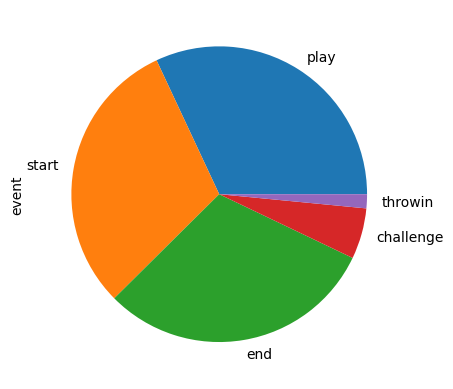

In [9]:
data_percentage.plot.pie()

In [10]:
data_non_null = data['event_attributes'].dropna()

In [11]:
data_non_null[1]

"['ball_action_forced']"

In [12]:
counter = {}
def flatten_lists(attributes):
    attributes_list = map_to_list(attributes)
    for value in attributes_list:
        if value in counter:
            counter[value] = counter[value] + 1
        else:
            counter[value] = 1
def map_to_list(str_imitiating_list):
    temp = str_imitiating_list[1:-1]
    type_without = temp.replace("'", "").strip()
    values = type_without.split(',')
    return  values


In [13]:
data_non_null.apply(lambda row : flatten_lists(row))
counter

{'ball_action_forced': 239,
 'opponent_dispossessed': 138,
 'pass': 3622,
 ' openplay': 3417,
 'cross': 136,
 'possession_retained': 44,
 ' freekick': 132,
 'fouled': 111,
 'opponent_rounded': 39,
 ' corner': 37,
 'challenge_during_ball_transfer': 53}

In [14]:
keys = list(counter.keys())
values = list(counter.values())

<BarContainer object of 11 artists>

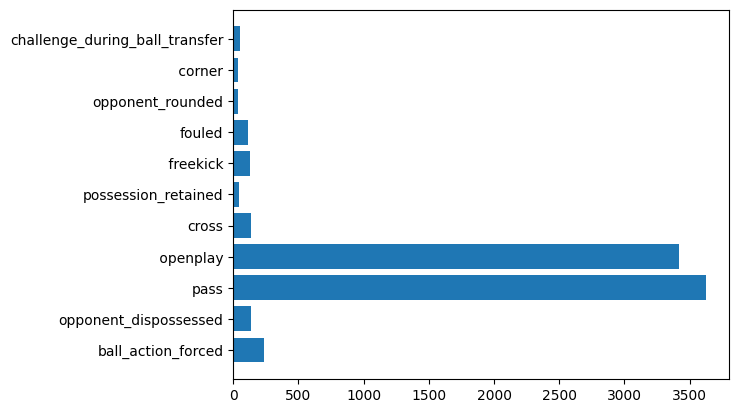

In [15]:
plt.barh(keys, values)

In [18]:
data.groupby(['video_id']).max('time')

,time
video_id,
1606b0e6_0,3014.731795
1606b0e6_1,3387.730393
35bd9041_0,3061.887807
35bd9041_1,3477.711658
3c993bd2_0,2998.972483
3c993bd2_1,3472.401262
407c5a9e_1,3445.221089
4ffd5986_0,3099.628836
9a97dae4_1,2999.676546


In [20]:
data['time'].max(), data['time'].min()

(3575.0007270923616, 175.02582192283313)